In [2]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d}"
today

'2022-03-14'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import manifold
from collections import defaultdict
#from mpl_toolkits.mplot3d import Axes3D
import math
import sklearn
import scipy
import os
import sys
#imports
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
#from backspinpy import fit_CV
#from backspinpy.Cef_tools import *
#from __future__ import division
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
#from sklearn.cross_validation import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import anndata

In [4]:
def package_version():
    alllist=[]
    for m in globals().values():
        if getattr(m, '__version__', None):
            alllist.append(f'{m.__name__}=={m.__version__}')
    return alllist

In [5]:
versionlist=package_version()
versionlist

['pandas==1.4.1',
 'numpy==1.19.2',
 'sklearn==1.0.2',
 'scipy==1.6.2',
 'anndata==0.7.8']

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from sklearn.decomposition import PCA
import umap

In [8]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2


In [9]:
dfprobref=pd.read_table("TrunkNeuralCrestChromaffin_reference_NNlearning_probability.tab",index_col=0,header=0,sep="\t")

In [10]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2


In [11]:
scref1=anndata.read("Integrated_Mouse_NeuralCrest.h5ad")
scref1

AnnData object with n_obs × n_vars = 13556 × 10765
    obs: 'Cluster', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'train_set_values'

In [12]:
scref1=scref1[dfprobref.index,:].copy()

In [13]:
scref1.obsm["Celltype_Score"]=dfprobref.values

In [14]:
scref1

AnnData object with n_obs × n_vars = 13556 × 10765
    obs: 'Cluster', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'train_set_values'

In [15]:
scref1.uns['Celltype_Score_RefCellType']

array(['Chromaffin', 'Schw_Bridge', 'Schw_SCP', 'Schwann/Glia',
       'Autonomic_Prog', 'Migratory_Prog', 'Mesenchyme_Prog',
       'Mesenchymal', 'Sympathetic', 'Schw_SympaBlast'], dtype=object)

In [16]:
dfprobref.columns

Index(['Chromaffin', 'Schw_Bridge', 'Schw_SCP', 'Autonomic_Prog',
       'Migratory_Prog', 'Mesenchyme_Prog', 'Mesenchymal', 'Schwann/Glia',
       'Sympathetic', 'Schw_SympaBlast'],
      dtype='object')

In [17]:
dfprobref2=pd.read_table("TrunkNeuralCrestChromaffin_NNlearning_Igor_HumanAdrenal_prediction_3242cells_fit_Ref_prob.tab",index_col=0,header=0,sep="\t")

In [18]:
scref2=anndata.read("Igor_humandata_scRNAseq_fit_Integrated_Mouse_NeuralCrest.h5ad", 
                  )

In [19]:
scref2=scref2[dfprobref2.index,:].copy()

In [20]:
scref2.obsm["Celltype_Score"]=dfprobref2.values

In [21]:
scref2.uns['Celltype_Score_RefCellType']

array(['Chromaffin', 'Schw_Bridge', 'Schw_SCP', 'Autonomic_Prog',
       'Migratory_Prog', 'Mesenchyme_Prog', 'Mesenchymal', 'Schwann/Glia',
       'Sympathetic', 'Schw_SympaBlast'], dtype=object)

In [22]:
swref = scref1.concatenate(scref2)

In [23]:
swref.uns["Celltype_Score_RefCellType"]=scref2.uns["Celltype_Score_RefCellType"]

In [24]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2


In [25]:
import SW2main98 as SCM

In [26]:
#swref,UMAPmodel=SCM.UMAPtrain(datax=swref,NN=25,mdist=0.6, rd=173, n_comp=2)

In [27]:
swref.obsm['X_umap']

KeyError: 'X_umap'

In [54]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2


In [57]:
UMAPmodel2=SCM.save_load_model(modelname=None, filename='umapNN25mdist06rd173backup.sav', type="load")

In [58]:
swref

AnnData object with n_obs × n_vars = 16798 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'Assigned_Cluster', 'AssignedColor'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score'

In [59]:
swref.obsm["Celltype_Score"].astype(float)

array([[8.83971649e-06, 6.00706336e-04, 1.31486380e-02, ...,
        9.99812319e+01, 8.45036766e-05, 9.11136937e-05],
       [4.54583934e-06, 4.65963754e-04, 8.62558905e-03, ...,
        9.99890060e+01, 3.82617966e-05, 4.24177277e-05],
       [7.21685591e-06, 8.16020424e-04, 1.74279638e-02, ...,
        9.99783465e+01, 2.48258044e-05, 5.17930024e-05],
       ...,
       [1.07928639e+01, 2.07915789e+00, 5.04764303e-06, ...,
        1.90838907e-06, 5.22461985e+01, 3.46465816e+01],
       [2.42836607e+01, 2.98042858e+01, 2.63207684e-03, ...,
        2.16393207e-04, 6.54417528e+00, 3.43203607e+01],
       [2.33567270e+01, 2.36401580e+01, 1.12805320e-04, ...,
        5.50246038e-06, 9.01005177e+00, 4.24239141e+01]])

In [60]:
X_rTest = UMAPmodel2.transform(swref.obsm["Celltype_Score"].astype(float))
swref.obsm['X_umap'] = X_rTest

In [61]:
color_dict2 = pd.Series({ 'SCPs':   (90,  10,  10), 'Chromaffin': (115, 60,  130),
                             'cycling':    (57, 105,   7),
             'Sympath':    (170, 180, 170),
                            'Cardiac_Mes':( 50, 180, 180),
 'Mesenchymal':( 50, 20, 50),
 'Early_Migratory_Prog':(255,0,0),
                          'Migratory_Prog':(255,0,0),
 'Gang_Endothelial':  ( 150, 80, 180),
 'Gang_JG':( 150, 60, 180),
 'Gang_NG':( 50, 220, 20),

 'Gang_Sympathetic':(100, 125, 70),
 'Late_Migratory_Prog':(200,20,100),
 'Mesenchyme_Prog':(255,215,0),
 'PNS_GLI_MNA_ENTG':(20, 100, 90),
 'PNS_GLI_MNA_SATG':(50, 60, 50),
 'PNS_GLI_MNA_SCHW':(150, 220, 50),
 'PNS_NeuN_MNA_ENT':(200, 30, 50),
 'PNS_NeuN_MNA_PSNF':(20, 130, 250),
 'PNS_NeuN_MNA_PSNP':(200, 69, 0),
 'PNS_NeuN_MNA_PSPEP':(100, 150, 0),
 'PNS_NeuN_MNA_SYCHO':(61, 125, 33),
 'Sympathetic':(29, 20, 100),
 'Schw_Bridge':(30, 250, 170),
 'Chromaffin':(112,128,144),
 'Schw_SCP':(165,42,42),
 'Schw_SympaBlast':(170, 250, 70),
 'Sensory_Prog':(75,0,130),
 'Autonomic_Prog':(0,0,255),
     'Schwann/Glia':( 110, 140, 100),
                         'OL':   (117, 245, 7) ,
              'OLIG':    (111,111,111), 'PeriC': (217, 215,   7)  ,'aRgl':    (180, 140, 130),
              'aNSC2':  (100, 180, 240),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'NC_delami':(230, 10, 100), 'NC_EarlyMigr':  (120, 15,215),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'NeuralTube':   ( 50, 180, 180),
                         'qRgl':  (  250,125,0),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'vSMC':    (170, 180, 170), 'SCPs':   (90,  10,  10), 'Chromaffin': (25, 60,  130),
                             'cycling':    (57, 105,   7),
             'Sympath':    (170, 180, 170),'SCP':   (190,  10,  10), 'chromaffin': (0,0,150),
                             'cycling':    (57, 105,   7),
             'sympathoblasts':    (170, 180, 170),
    })
color_dict2 = color_dict2.map(lambda x: list(map(lambda y: y/255., x)))

In [62]:
set(swref.obs["Cluster"])

{'Autonomic_Prog',
 'Chromaffin',
 'Mesenchymal',
 'Mesenchyme_Prog',
 'Migratory_Prog',
 'SCP',
 'Schw_Bridge',
 'Schw_SCP',
 'Schw_SympaBlast',
 'Schwann/Glia',
 'Sympathetic',
 'chromaffin',
 'cycling',
 'sympathoblasts'}

In [63]:
colorlist=[]
for item in swref.obs["Cluster"]:
    colorlist.append(color_dict2[item])

In [64]:
swref.obs["color"]=colorlist

In [65]:
#plt.scatter(swref.obsm["X_umap"][:,0],swref.obsm["X_umap"][:,1],c=swref.obs["color"])

In [66]:
#import SW2main16

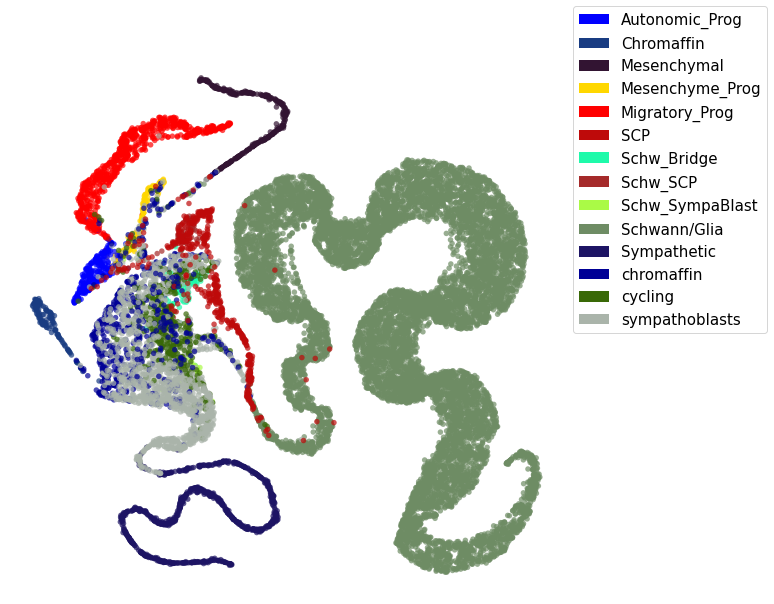

In [67]:
swref,ax=SCM.UMAP_plot(datax=swref,figuresize=(10,10),alphavalue=0.7, lwvalue=0.01, markervalue=".",Ncol=1,
             dotsize=120,lengendfont=15, legendloc=2,bbox_to_anchorvalues=(1, 1.1))

In [68]:
swref

AnnData object with n_obs × n_vars = 16798 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'Assigned_Cluster', 'AssignedColor', 'color'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'X_umap'

In [69]:
#import SW2main21

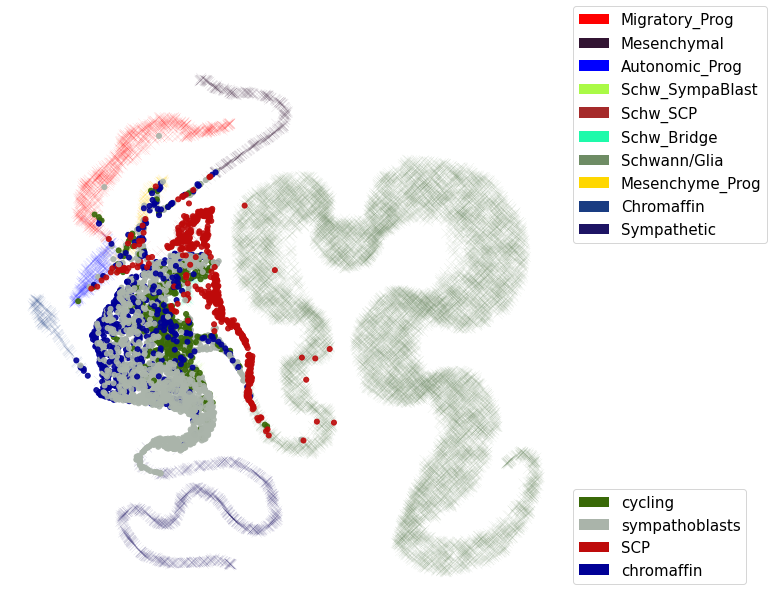

In [70]:
swref1,swref2, ax=SCM.UMAPplotRefPred(DataRef=swref[swref.obs["batch"] =="0"], DataPdt=swref[swref.obs["batch"] =="1"], 
                                            refClusterName="Cluster",pdtClusterName="Cluster", 
                                            refColorCode='color', pdtColorCode='color',figuresize=(10, 10),
                    RefAlphaValue=0.6, RefLwValue=0.1, RefMarkerValue="x", RefDotSize=100,
                    PdtAlphaValue=0.9, PdtLwValue=1, PdtMarkerValue=".", PdtDotSize=100,
                    lengendfont=15, RefLegendloc=2, PdtLegendloc=3, Refbbox_to_anchorvalues=(1, 1.1),
                    Pdtbbox_to_anchorvalues=(1, 0.01))

# Clustering

In [50]:
#import SW2main as SCM

In [51]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2


In [52]:
swref=SCM.SWAPLINE_dist(datax=swref, n_neighbors=50, metric = 'euclidean')

In [53]:
swref

AnnData object with n_obs × n_vars = 16798 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'color'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'X_umap'
    obsp: 'connectivities', 'distances'

In [55]:
Th_value=15
swref=SCM.clusterfinder(datax=swref,Th_value =Th_value, method="Louvain")

In [56]:
swref

AnnData object with n_obs × n_vars = 16798 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'color', 'Assigned_Celltype'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'X_umap'
    obsp: 'connectivities', 'distances'

In [57]:
#del swref.obs['Assignedcolor']

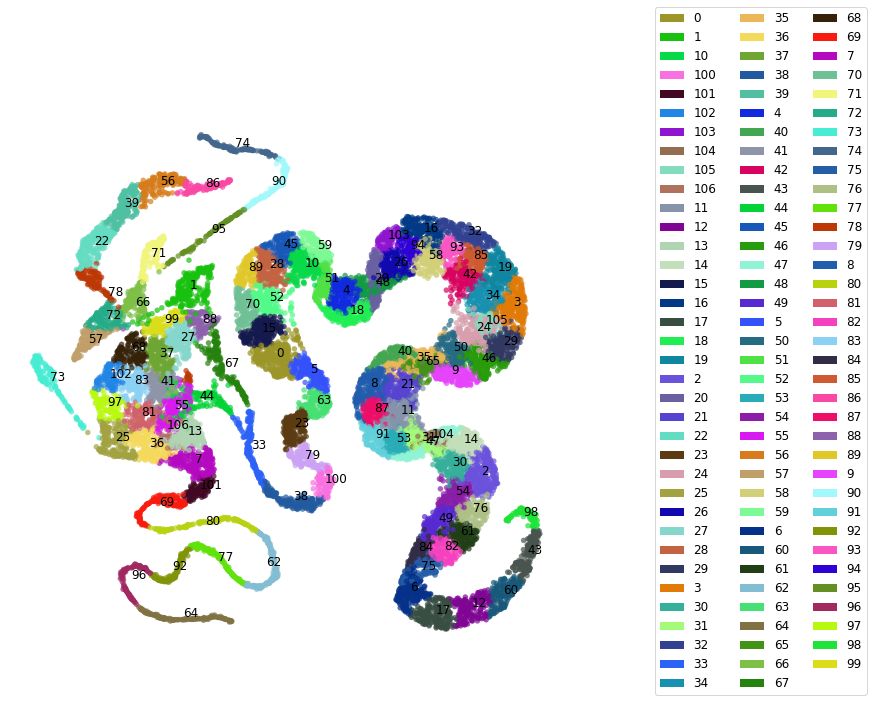

In [58]:
swrefx,ax=SCM.UMAP_plot(datax=swref,clustername="Assigned_Celltype",colorcode="Assignedcolor",
                              legendOnPlot=True,legendshow=True,Ncol=3,
                              figuresize=(10,10),alphavalue=0.7, lwvalue=0.01, markervalue=".",
             dotsize=120,lengendfont=12, legendloc=2,bbox_to_anchorvalues=(1.15, 1.2))

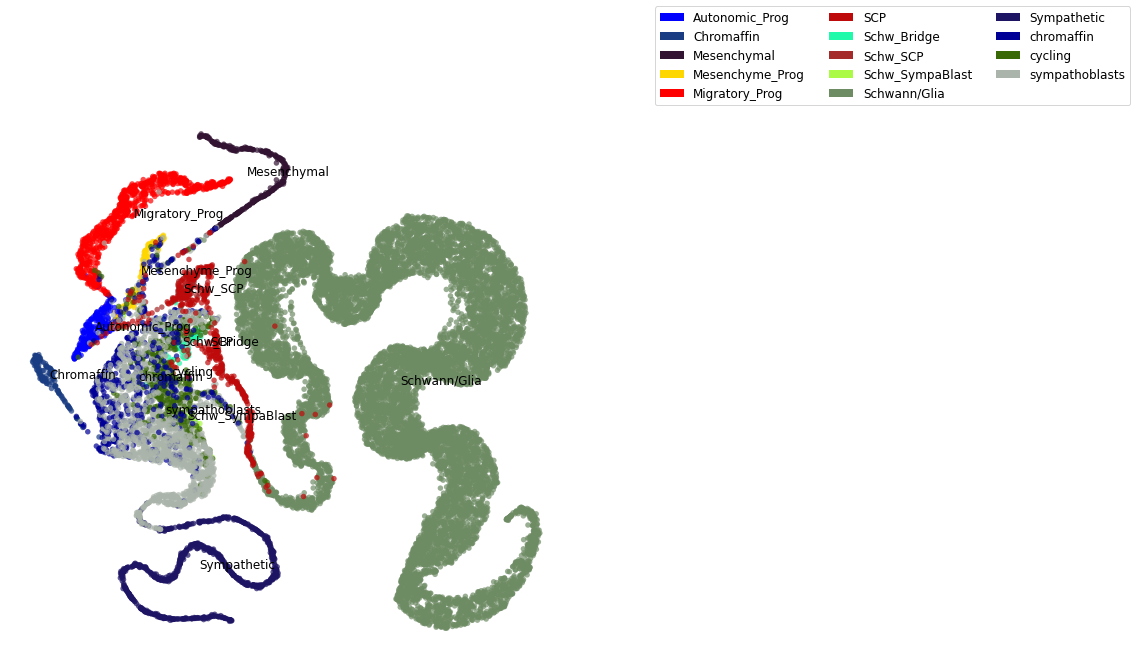

In [60]:
swref,ax=SCM.UMAP_plot(datax=swref,clustername="Cluster",colorcode="color",
                              legendOnPlot=True,legendshow=True,Ncol=3,
                              figuresize=(10,10),alphavalue=0.7, lwvalue=0.01, markervalue=".",
             dotsize=120,lengendfont=12, legendloc=2,bbox_to_anchorvalues=(1.15, 1.2))

In [31]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2\20220306

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2\20220306


In [32]:
dfposi=pd.read_table("Ready_2022-03-06_Igor_Human10x_mouseSS2_UMAP_clustering.tab",index_col=0,header=0,sep="\t")

In [33]:
idlist=dfprobref.index.tolist()+dfprobref2.index.tolist()
idlist[-5:]

['R53c_w00_GCCGTGATCGAACCTA',
 'R53c_w00_GGATCTAGTACCAGAG',
 'R53c_w00_GTCATGATCTTCTGGC',
 'R53c_w00_TACCTCGGTCATTCCC',
 'R53c_w00_TGCTCCAGTGGATCGA']

In [34]:
dfposi=dfposi.reindex(idlist).dropna()
dfposi

UMAP_X     UMAP_Y         Cluster  \
PNS_GLI_MNA_10X81_1_CACGCCACTGTGTA-  17.801172  13.613599    Schwann/Glia   
PNS_GLI_MNA_10X81_3_GAGTCCACTGAAGG-  14.757493   4.498387    Schwann/Glia   
PNS_GLI_MNA_10X81_1_TCTCTTCTACTATC-  14.911586  18.595280    Schwann/Glia   
PNS_GLI_MNA_10X82_2_GCGATCAATAACGA-  15.006281  -3.411112    Schwann/Glia   
PNS_GLI_MNA_10X82_2_TAGCGTCGTCCAGG-   4.226594   0.884749    Schwann/Glia   
...                                        ...        ...             ...   
R53c_w00_GCCGTGATCGAACCTA            -5.548871   3.492619  sympathoblasts   
R53c_w00_GGATCTAGTACCAGAG            -0.979613   4.837048  sympathoblasts   
R53c_w00_GTCATGATCTTCTGGC             0.420351   3.283141  sympathoblasts   
R53c_w00_TACCTCGGTCATTCCC            -2.747126   5.563001  sympathoblasts   
R53c_w00_TGCTCCAGTGGATCGA            -2.036744   5.187196  sympathoblasts   

                                     Louvain_15           Celltype  
PNS_GLI_MNA_10X81_1_CACGCCACTGTGTA-          14               Glia  
PNS_GLI_MNA_10X81_3_GAGTCCACTGAAGG-         108               Glia  
PNS_GLI_MNA_10X81_1_TCTCTTCTACTATC-           0               Glia  
PNS_GLI_MNA_10X82_2_GCGATCAATAACGA-          15               Glia  
PNS_GLI_MNA_10X82_2_TAGCGTCGTCCAGG-          33               Glia  
...                                         ...                ...  
R53c_w00_GCCGTGATCGAACCTA                     7        Chromaffin1  
R53c_w00_GGATCTAGTACCAGAG                    57        Neuroblast2  
R53c_w00_GTCATGATCTTCTGGC                    57        Neuroblast2  
R53c_w00_TACCTCGGTCATTCCC                    25  cyclingNeuroblast  
R53c_w00_TGCTCCAGTGGATCGA                   103  cyclingNeuroblast  

[16798 rows x 5 columns]

In [35]:
swref.obs["Assigned_Cluster"]=dfposi["Celltype"].tolist()

In [36]:
color_dictTest = pd.Series({   'SCP':   (90,  10,  10), 'Chromaffin1': (25, 60,  130),
                             'cycling':    (57, 105,   7),
             'Sympath':    (170, 180, 170),'SCP':   (190,  10,  10),  'Chromaffin': (25, 60,  130),
                             'cycling':    (57, 105,   7),
             'sympathoblasts':    (170, 180, 170),
                            "Glia": (235, 125,  128), "Mes": (55, 95,  28),
                          'Chromaffin2':   (55, 55,  78), 'Neuroblast1': (130,60,  25),
                            'Neuroblast2':    (57, 105,   7),"interm_Glia": (175, 175,  28),
            'Bridge_SCP':    (170, 180, 170),
                           'connectingChromaffin':    ( 95, 186,  70),  'Auto_prog':    (180, 140, 130),
       'cyclingNeuroblast':  (100, 100, 240), 'Migr_prog': ( 80, 235, 255),  'Mes_prog':(249,125,5),
            'cycling SCPs':(250, 125, 0),35:(230, 140, 120), 'SympNeuron':  (10,10,255),
    })
color_dictTest= color_dictTest.map(lambda x: list(map(lambda y: y/255., x)))

In [37]:
colorlist=[]
for item in swref.obs["Assigned_Cluster"]:
    colorlist.append(color_dictTest[item])
swref.obs["AssignedColor"]=colorlist

In [38]:
swref

AnnData object with n_obs × n_vars = 16798 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'Assigned_Cluster', 'AssignedColor'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score'

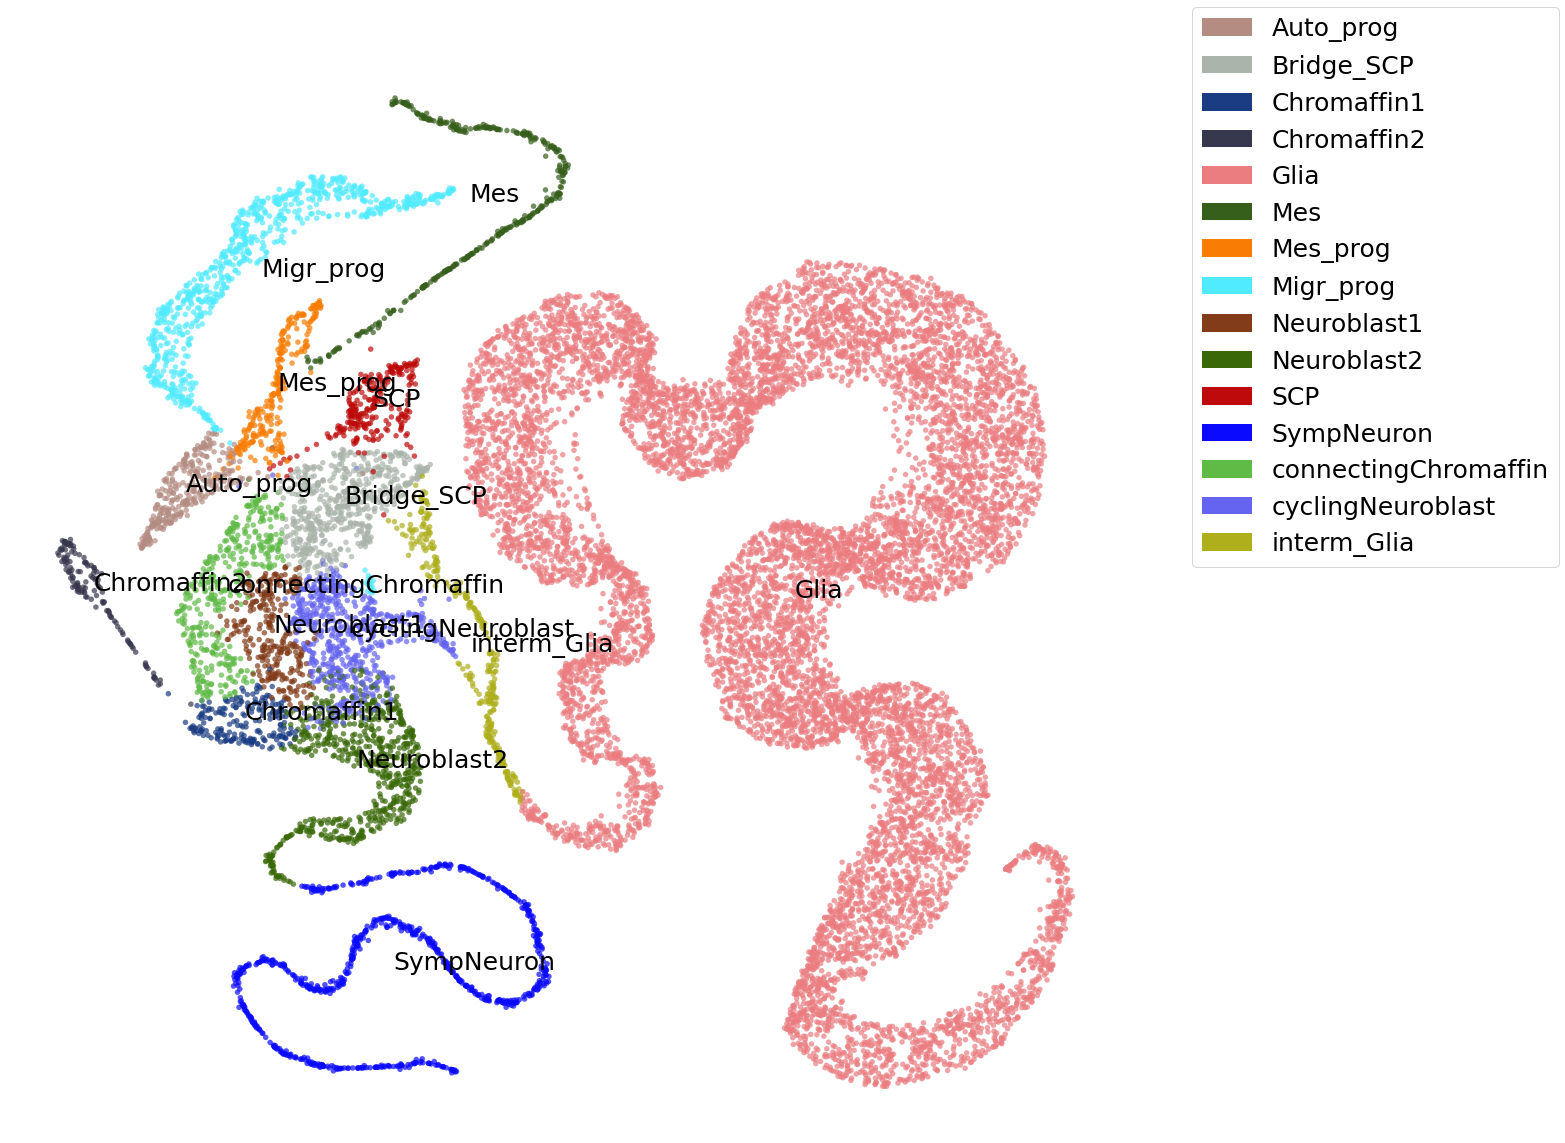

In [71]:
swrefx,ax=SCM.UMAP_plot(datax=swref,clustername="Assigned_Cluster",colorcode="AssignedColor",
                              legendOnPlot=True,legendshow=True,Ncol=1,
                              figuresize=(20,20),alphavalue=0.7, lwvalue=0.01, markervalue=".",
             dotsize=120,lengendfont=25, legendloc=2,bbox_to_anchorvalues=(1.05, 1.05))

In [ ]:
swrefx,ax=SCM.UMAP_plot(datax=swref,clustername="Assigned_Cluster",colorcode="AssignedColor",
                              legendOnPlot=False,legendshow=True,Ncol=1,
                              figuresize=(20,20),alphavalue=0.7, lwvalue=0.01, markervalue=".",
             dotsize=120,lengendfont=25, legendloc=2,bbox_to_anchorvalues=(1.05, 1.05))

# Transfer_learning

In [71]:
cd D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\BuidingCode\SWAPLINE2\SWAPLINE2


In [72]:
#import SW2main38

In [73]:
UMAPmodel2=SCM.save_load_model(modelname=None, filename='20220307_umapNN25mdist06rd173backup.sav', type="load")

In [74]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2


In [483]:
cd D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2

D:\Dropbox\data\proj\PE_HYZ\PublicDataSet\NBL_SZscRNA\SWAPLINE2


In [537]:
swpdt=anndata.read("20220310_Igor_humandata_scRNAseq_fit_Integrated_Mouse_NeuralCrest.h5ad", 
                  )

In [538]:
swpdt

AnnData object with n_obs × n_vars = 3242 × 25787
    obs: 'Cluster', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values'

In [539]:
swpdt1=swref[swref.obs['batch']=="1",:]

In [540]:
swpdt1

View of AnnData object with n_obs × n_vars = 3242 × 10465
    obs: 'Cluster', 'mtrain_index', 'batch', 'color', 'Assigned_Cluster', 'AssignedColor'
    var: 'RefGeneList', 'Filter1-0', 'MVgene-0'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'X_umap'

In [541]:
colist=[]
for item in swpdt1.obs.index:
    colist.append(item[:-2])

In [542]:
swpdt=swpdt[colist,:]
swpdt

View of AnnData object with n_obs × n_vars = 3242 × 25787
    obs: 'Cluster', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'Celltype_OrderNumber', 'Celltype_Score_RefCellType', 'mclasses_names', 'mwanted_order', 'train_set_gene'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'test_set_values'

In [561]:
swpdt.obs=swpdt1.obs
swpdt.uns=swpdt1.uns
swpdt.obsm=swpdt1.obsm

#dfpcaTest: df, row name==Cell ID, columns=features
#dfclusTest: df,row name==Cell ID, columns=[....., "Cluster"]
#dfref:df, row name==Cell ID, columns=features
#dfrefclus: df,row name==Cell ID, columns=[....., "Celltype"]
swpdt=SCM.transfer_learning(UMAPmodel=UMAPmodel2,datapdt=swpdt, 
                                  datax=swref,clustername= 'Assigned_Cluster', colorcode='AssignedColor', n_neighbors=50)


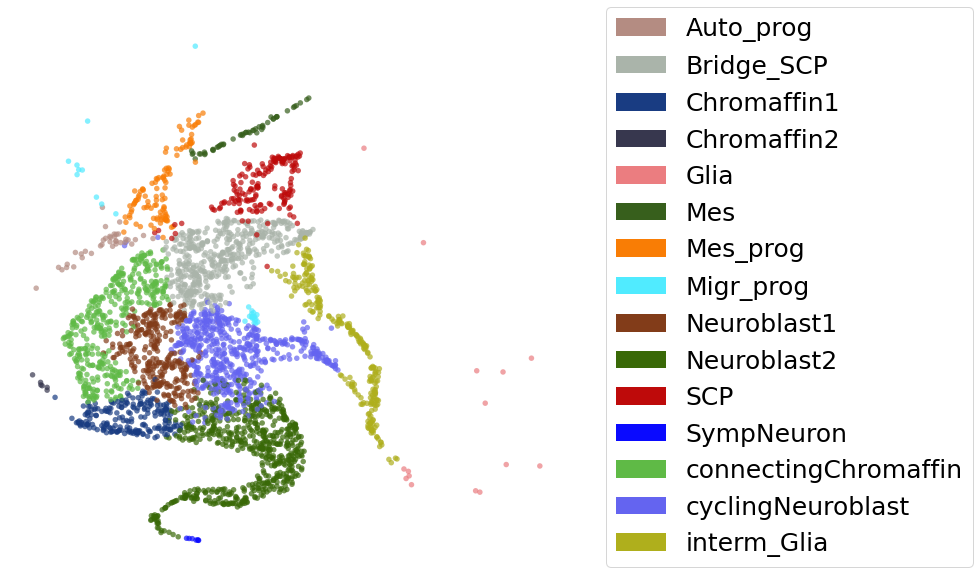

In [546]:
swpdt,ax=SCM.UMAP_plot(datax=swpdt,clustername="Assigned_Cluster",colorcode="AssignedColor",
                              legendOnPlot=False,legendshow=True,Ncol=1,
                              figuresize=(10,10),alphavalue=0.7, lwvalue=0.01, markervalue=".",
             dotsize=120,lengendfont=25, legendloc=2,bbox_to_anchorvalues=(1.05, 1.05))

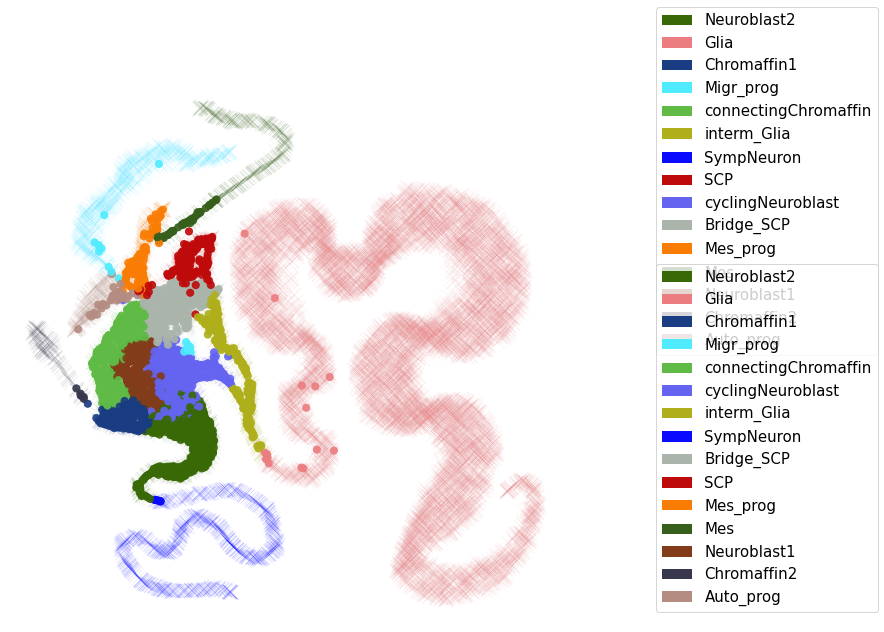

In [547]:
swref1,swref2, ax=SCM.UMAPplotRefPred(DataRef=swref, DataPdt=swpdt, 
                                            refClusterName="Assigned_Cluster",pdtClusterName="Assigned_Cluster", 
                                            refColorCode='AssignedColor', pdtColorCode='AssignedColor',figuresize=(10, 10),
                    RefAlphaValue=0.6, RefLwValue=0.1, RefMarkerValue="x", RefDotSize=200,
                    PdtAlphaValue=0.9, PdtLwValue=1, PdtMarkerValue=".", PdtDotSize=200,
                    lengendfont=15, RefLegendloc=2, PdtLegendloc=3, Refbbox_to_anchorvalues=(1.15, 1.15),
                    Pdtbbox_to_anchorvalues=(1.15, 0.01))

In [548]:
color_dictTest = pd.Series({ 'SCPs':   (90,  10,  10), 'Chromaffin': (115, 60,  130),
                             'cycling':    (57, 105,   7),
             'Sympath':    (170, 180, 170),
                            'Cardiac_Mes':( 50, 180, 180),
 'Mesenchymal':( 50, 20, 50),
 'Early_Migratory_Prog':(255,0,0),
                          'Migratory_Prog':(255,0,0),
 'Gang_Endothelial':  ( 150, 80, 180),
 'Gang_JG':( 150, 60, 180),
 'Gang_NG':( 50, 220, 20),

 'Gang_Sympathetic':(100, 125, 70),
 'Late_Migratory_Prog':(200,20,100),
 'Mesenchyme_Prog':(255,215,0),
 'PNS_GLI_MNA_ENTG':(20, 100, 90),
 'PNS_GLI_MNA_SATG':(50, 60, 50),
 'PNS_GLI_MNA_SCHW':(150, 220, 50),
 'PNS_NeuN_MNA_ENT':(200, 30, 50),
 'PNS_NeuN_MNA_PSNF':(20, 130, 250),
 'PNS_NeuN_MNA_PSNP':(200, 69, 0),
 'PNS_NeuN_MNA_PSPEP':(100, 150, 0),
 'PNS_NeuN_MNA_SYCHO':(61, 125, 33),
 'Sympathetic':(29, 20, 100),
 'Schw_Bridge':(30, 250, 170),
 'Chromaffin':(112,128,144),
 'Schw_SCP':(165,42,42),
 'Schw_SympaBlast':(170, 250, 70),
 'Sensory_Prog':(75,0,130),
 'Autonomic_Prog':(0,0,255),
     'Schwann/Glia':( 110, 140, 100),
                         'OL':   (117, 245, 7) ,
              'OLIG':    (111,111,111), 'PeriC': (217, 215,   7)  ,'aRgl':    (180, 140, 130),
              'aNSC2':  (100, 180, 240),  'SMC': ( 80, 235, 255),'aaSMC':(139,69,19),
             'NC_auto':(10, 120, 190), 'NC_delami':(230, 10, 100), 'NC_EarlyMigr':  (120, 15,215),
             'Meni_FB':   (190,  10,  10),'Meni_Neuron': (225, 160,  30),
                       'Meni_Rgl':    ( 159,155,110),
           'NC_Mes': (69,155,110)  ,'migratory 1': (215, 105,  30) , 'NC_Migr':  (190, 200, 190),'NeuralTube':   ( 50, 180, 180),
                         'qRgl':  (  250,125,0),'qNSC2': (215, 105,  30),'NC_sensory':  (79,47,79)   ,
              'vSMC':    (170, 180, 170), 'SCPs':   (90,  10,  10), 'Chromaffin': (25, 60,  130),
                             'cycling':    (57, 105,   7),
             'Sympath':    (170, 180, 170),'SCP':   (190,  10,  10), 'chromaffin': (0,0,150),
                             'cycling':    (57, 105,   7),
             'sympathoblasts':    (170, 180, 170),
    })
color_dictTest= color_dictTest.map(lambda x: list(map(lambda y: y/255., x)))

In [549]:
colorlist3=[]
for item in swpdt.obs["Cluster"]:
    colorlist3.append(color_dictTest[item])

In [550]:
swpdt

AnnData object with n_obs × n_vars = 3242 × 25787
    obs: 'Cluster', 'mtrain_index', 'batch', 'color', 'Assigned_Cluster', 'AssignedColor'
    var: 'RefGeneList'
    uns: 'Celltype_Score_RefCellType'
    obsm: 'CelltypeScoreCoordinates', 'Celltype_Score', 'X_umap'

In [562]:
swpdt.obs["Color"]=swpdt.obs["color"]

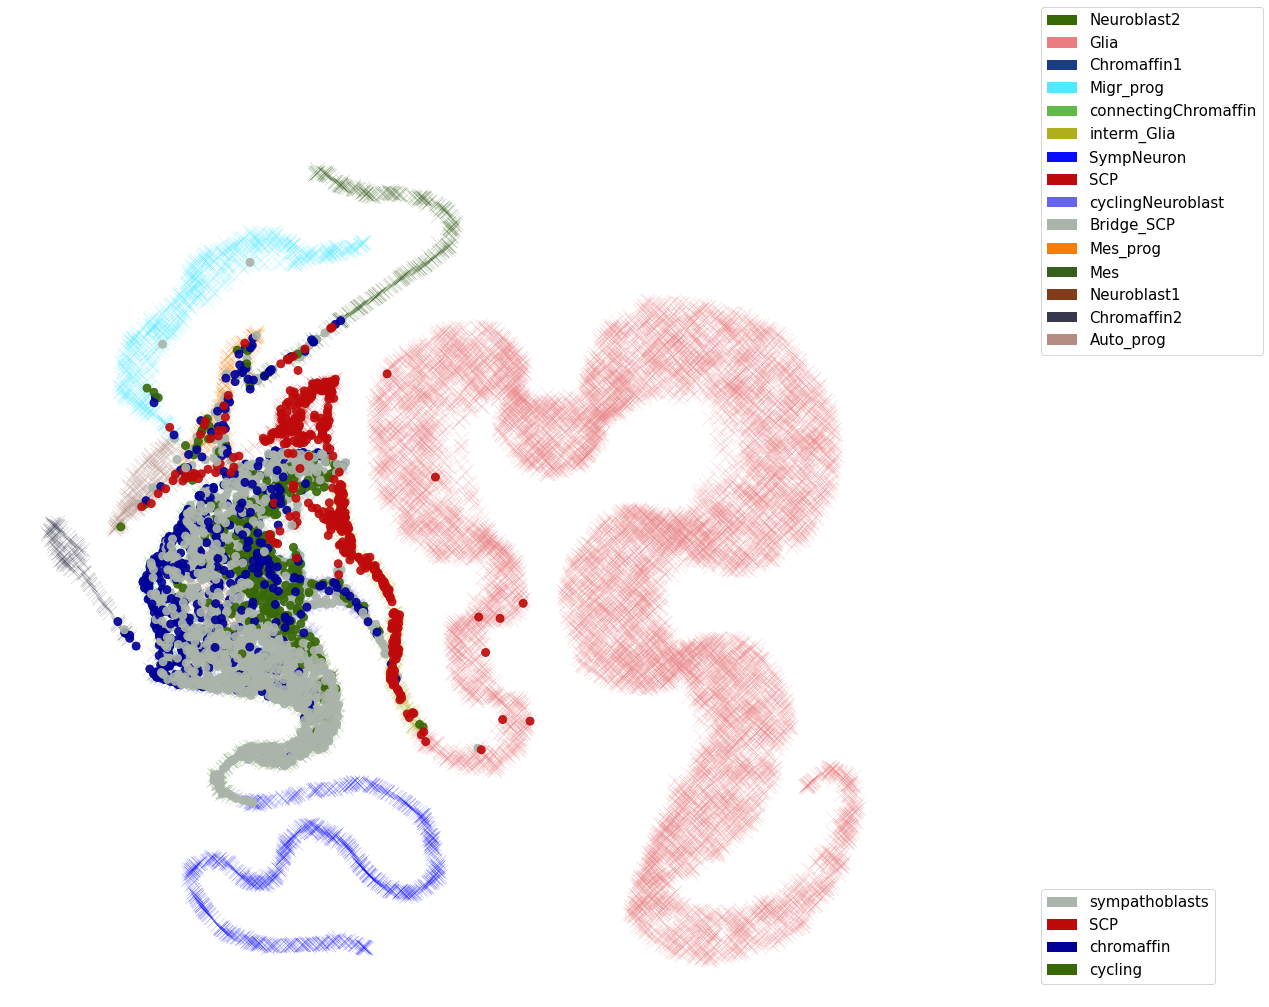

In [563]:
swref,swpdt, ax=SCM.UMAPplotRefPred(DataRef=swref, DataPdt=swpdt, 
                                            refClusterName="Assigned_Cluster",pdtClusterName="Cluster", 
                                            refColorCode='AssignedColor', pdtColorCode='Color',figuresize=(16, 16),
                    RefAlphaValue=0.6, RefLwValue=0.25, RefMarkerValue="x", RefDotSize=200,
                    PdtAlphaValue=0.9, PdtLwValue=1, PdtMarkerValue=".", PdtDotSize=250,
                    lengendfont=15, RefLegendloc=2, PdtLegendloc=3, Refbbox_to_anchorvalues=(1.15, 1.15),
                    Pdtbbox_to_anchorvalues=(1.15, 0.01))

In [564]:
swpdt=SCM.scaling_data(datax=swpdt,LogMinMax=True)

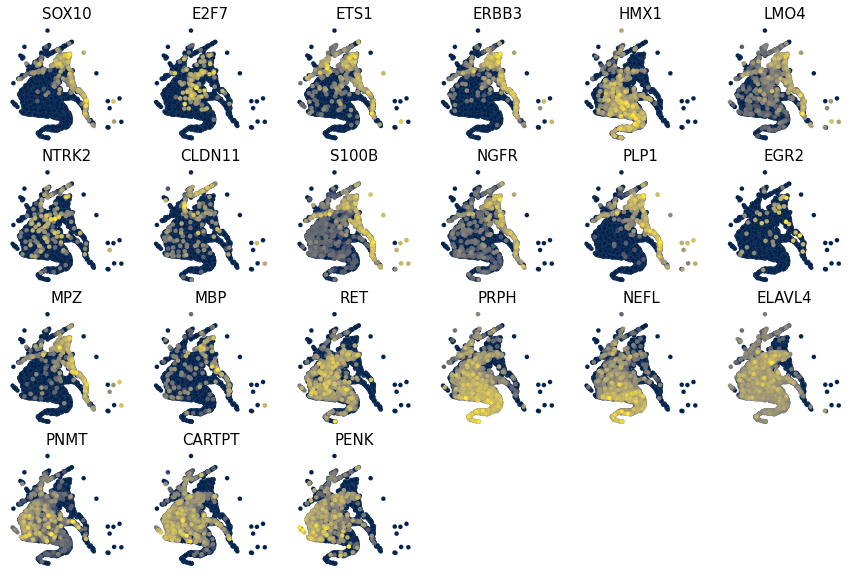

In [566]:
nrow=4
Genelist=["SOX10","E2F7","ETS1","ERBB3","HMX1","LMO4","NTRK2","CLDN11","S100B","NGFR","PLP1","EGR2","MPZ","MBP",
          "RET","PRPH","NEFL","ELAVL4","PNMT","CARTPT","PENK"]
fig=SCM.MarkerGenePlot(datax=swpdt,genelist=Genelist,nrow=4)


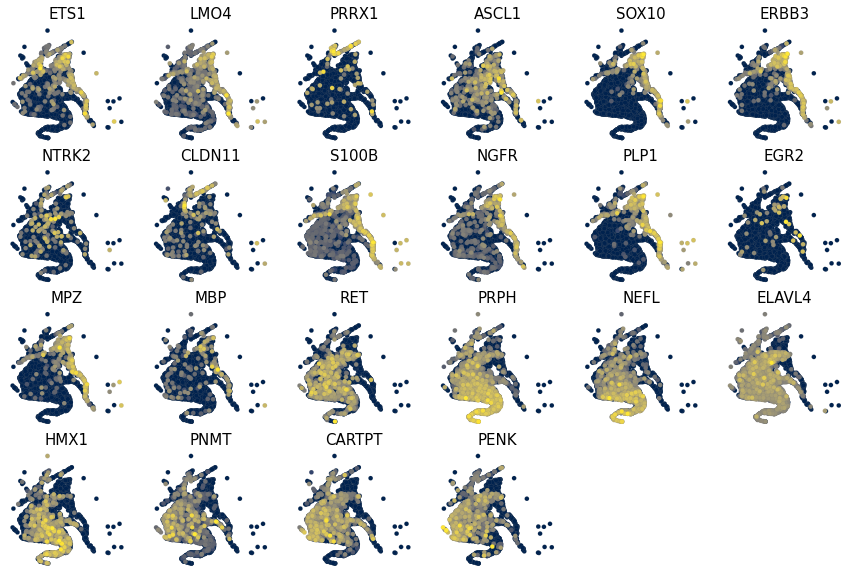

In [569]:
nrow=4
Genelist=["ETS1","LMO4","PRRX1","ASCL1","SOX10","ERBB3","NTRK2","CLDN11","S100B","NGFR","PLP1","EGR2","MPZ","MBP",
          "RET","PRPH","NEFL","ELAVL4","HMX1","PNMT","CARTPT","PENK"]
fig=SCM.MarkerGenePlot(datax=swpdt,genelist=Genelist,nrow=4)


In [ ]:
cd .

In [603]:
del swpdt.obs["AssignedColor"]

In [555]:
del swpdt.obs["color"]

In [607]:
swpdt.write("_scRNAseq_fit_Integrated_Mouse_NeuralCrest.h5ad")